### Load libraries

In [1]:
import sys
sys.path.insert(0, '../scripts/')

from load_modify_sample_utils import load_model, get_objective_functions, modify_model, get_reaction_bounds
from load_modify_sample_utils import sample_dingo, sample_optgp, plot_grid_95_reactions, sampling_statistics

### Load a model

In [2]:

ec_cobra_model, ec_cobra_reactions, ec_dingo_model, ec_dingo_reactions = load_model("../ext_data/models/e_coli_core.xml")

default_objective_functions = get_objective_functions(ec_cobra_model)
print(default_objective_functions)

default_reaction_bounds = get_reaction_bounds(ec_cobra_model)
print(default_reaction_bounds.get("BIOMASS_Ecoli_core_w_GAM"))



Set parameter Username
Set parameter LicenseID to value 2634947
Academic license - for non-commercial use only - expires 2026-03-11
['BIOMASS_Ecoli_core_w_GAM']
(0.0, 1000.0)


### Perform FBA on the initial model

In [3]:
solution = ec_cobra_model.optimize()
print(solution.objective_value)

0.8739215069684302


### Modify a model

Set optimal percentage to 100

In [4]:
ec_cobra_model_condition_100, ec_dingo_model_condition_100 = modify_model(
    cobra_model         = ec_cobra_model,
    objective_function  = "BIOMASS_Ecoli_core_w_GAM",
    optimal_percentage  = 100,
    objective_direction = "max"
)

updated_objective_functions = get_objective_functions(ec_cobra_model_condition_100)
print(updated_objective_functions)

updated_reaction_bounds = get_reaction_bounds(ec_cobra_model_condition_100)
print(updated_reaction_bounds.get("BIOMASS_Ecoli_core_w_GAM"))

Read LP format model from file /tmp/tmp3t45_pmd.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
['BIOMASS_Ecoli_core_w_GAM']
(0.872922, 1000)


Set optimal percentage to 0

In [5]:
ec_cobra_model_condition_0, ec_dingo_model_condition_0 = modify_model(
    cobra_model         = ec_cobra_model,
    objective_function  = "BIOMASS_Ecoli_core_w_GAM",
    optimal_percentage  = 0,
    objective_direction = "max"
)

updated_objective_functions = get_objective_functions(ec_cobra_model_condition_0)
print(updated_objective_functions)

updated_reaction_bounds = get_reaction_bounds(ec_cobra_model_condition_0)
print(updated_reaction_bounds.get("BIOMASS_Ecoli_core_w_GAM"))


Read LP format model from file /tmp/tmp_lbaqgfc.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
['BIOMASS_Ecoli_core_w_GAM']
(0.0, 1000)


### Peform FBA on the modified models

In [6]:
solution_1 = ec_cobra_model_condition_100.optimize()
print(solution_1.objective_value)

solution_2 = ec_cobra_model_condition_0.optimize()
print(solution_2.objective_value)


0.8739215069684301
0.8739215069684301


### Sample with the modified models

.. using `dingo`

In [7]:

samples_dingo_condition_100 = sample_dingo(ec_dingo_model_condition_100, reaction_in_rows = True, ess=3000, solver="gurobi", final_n_samples=2000)
samples_dingo_condition_0 = sample_dingo(ec_dingo_model_condition_0, reaction_in_rows = True, ess=3000, solver="gurobi", final_n_samples=2000)

Set parameter Username
Set parameter LicenseID to value 2634947
Academic license - for non-commercial use only - expires 2026-03-11
phase 1: number of correlated samples = 500, effective sample size = 11, ratio of the maximum singilar value over the minimum singular value = 2123.03
phase 2: number of correlated samples = 500, effective sample size = 4, ratio of the maximum singilar value over the minimum singular value = 244.488
phase 3: number of correlated samples = 500, effective sample size = 7, ratio of the maximum singilar value over the minimum singular value = 307.103
phase 4: number of correlated samples = 500, effective sample size = 98, ratio of the maximum singilar value over the minimum singular value = 27.4437
phase 5: number of correlated samples = 500, effective sample size = 124, ratio of the maximum singilar value over the minimum singular value = 2.57832
phase 6: number of correlated samples = 2400, effective sample size = 873
phase 7: number of correlated samples = 

[5]maximum marginal PSRF: 1.0065


phase 1: number of correlated samples = 500, effective sample size = 6, ratio of the maximum singilar value over the minimum singular value = 4797.83
phase 2: number of correlated samples = 500, effective sample size = 26, ratio of the maximum singilar value over the minimum singular value = 305.317
phase 3: number of correlated samples = 500, effective sample size = 4, ratio of the maximum singilar value over the minimum singular value = 329.101
phase 4: number of correlated samples = 500, effective sample size = 141, ratio of the maximum singilar value over the minimum singular value = 14.1999
phase 5: number of correlated samples = 500, effective sample size = 169, ratio of the maximum singilar value over the minimum singular value = 2.70732
phase 6: number of correlated samples = 2400, effective sample size = 945
phase 7: number of correlated samples = 2400, effective sample size = 1042
phase 8: number of correlated samples = 1600, effective sample size = 706
[5]total ess 3039: num

[5]maximum marginal PSRF: 1.00747


.. using OptGp

In [8]:
samples_optgp_condition_100 = sample_optgp(ec_cobra_model_condition_100, n_samples = 3000, thinning=100, reaction_in_rows = True)
samples_optgp_condition_0 = sample_optgp(ec_cobra_model_condition_0, n_samples = 3000, thinning=100, reaction_in_rows = True)

Read LP format model from file /tmp/tmp9ccz459f.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file /tmp/tmpuswi7ial.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros


### Plot grid of the distributions

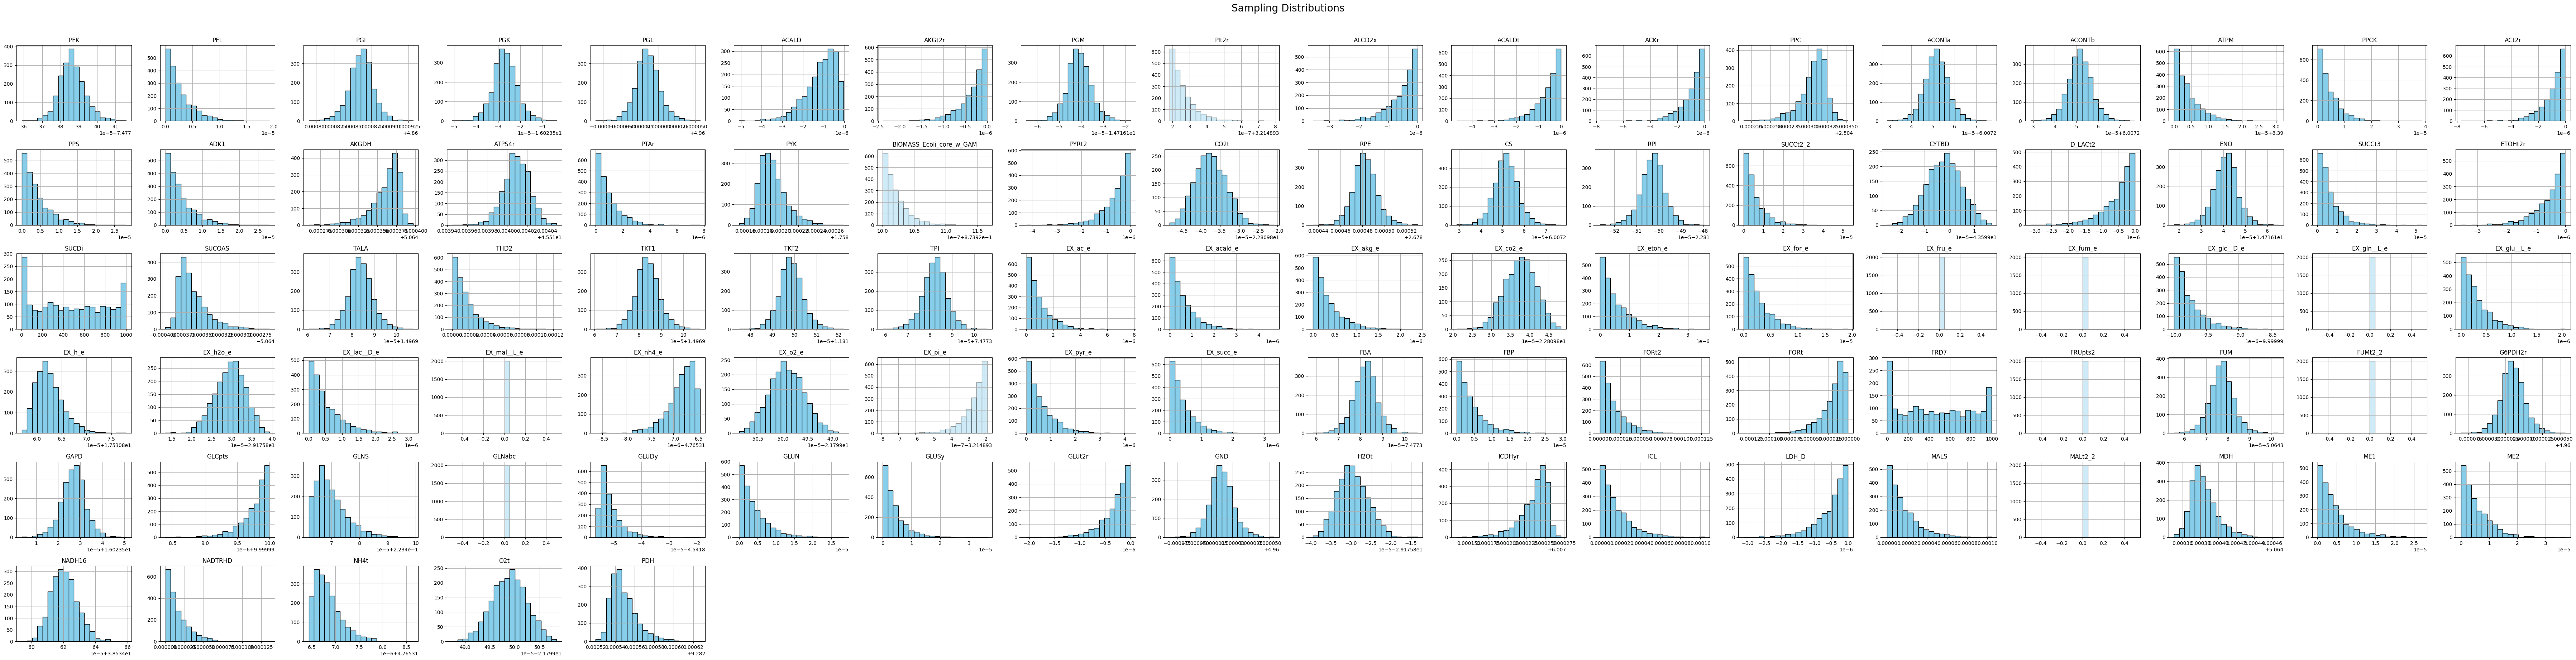

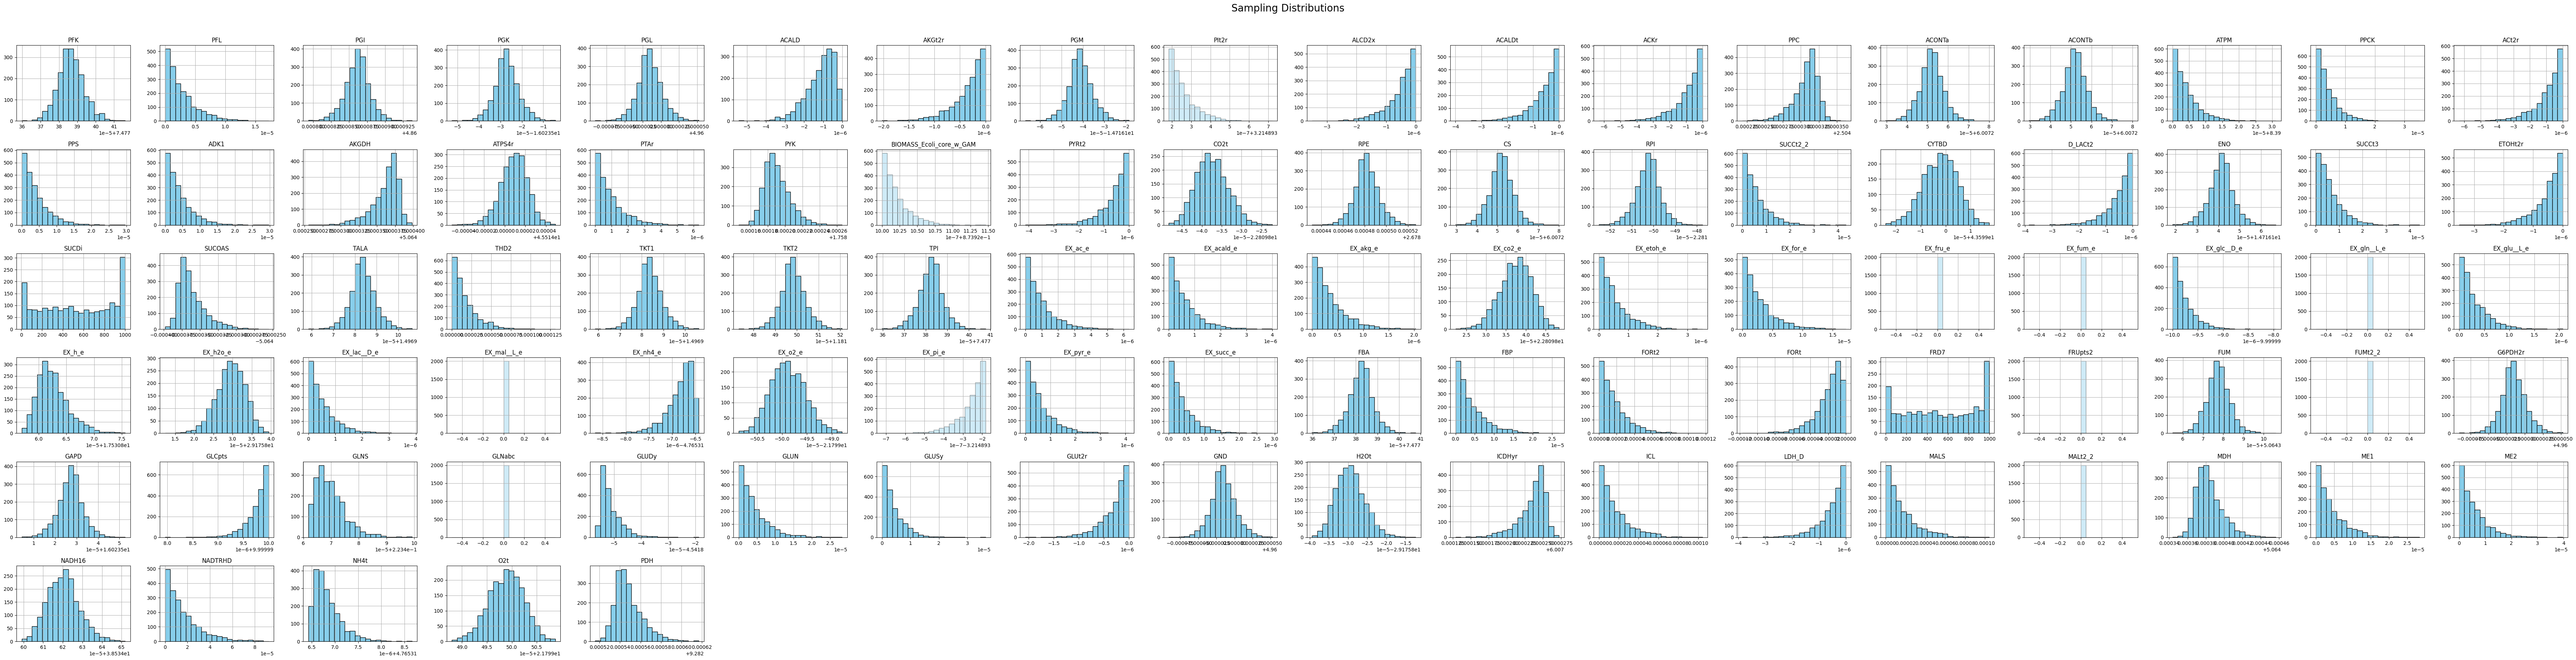

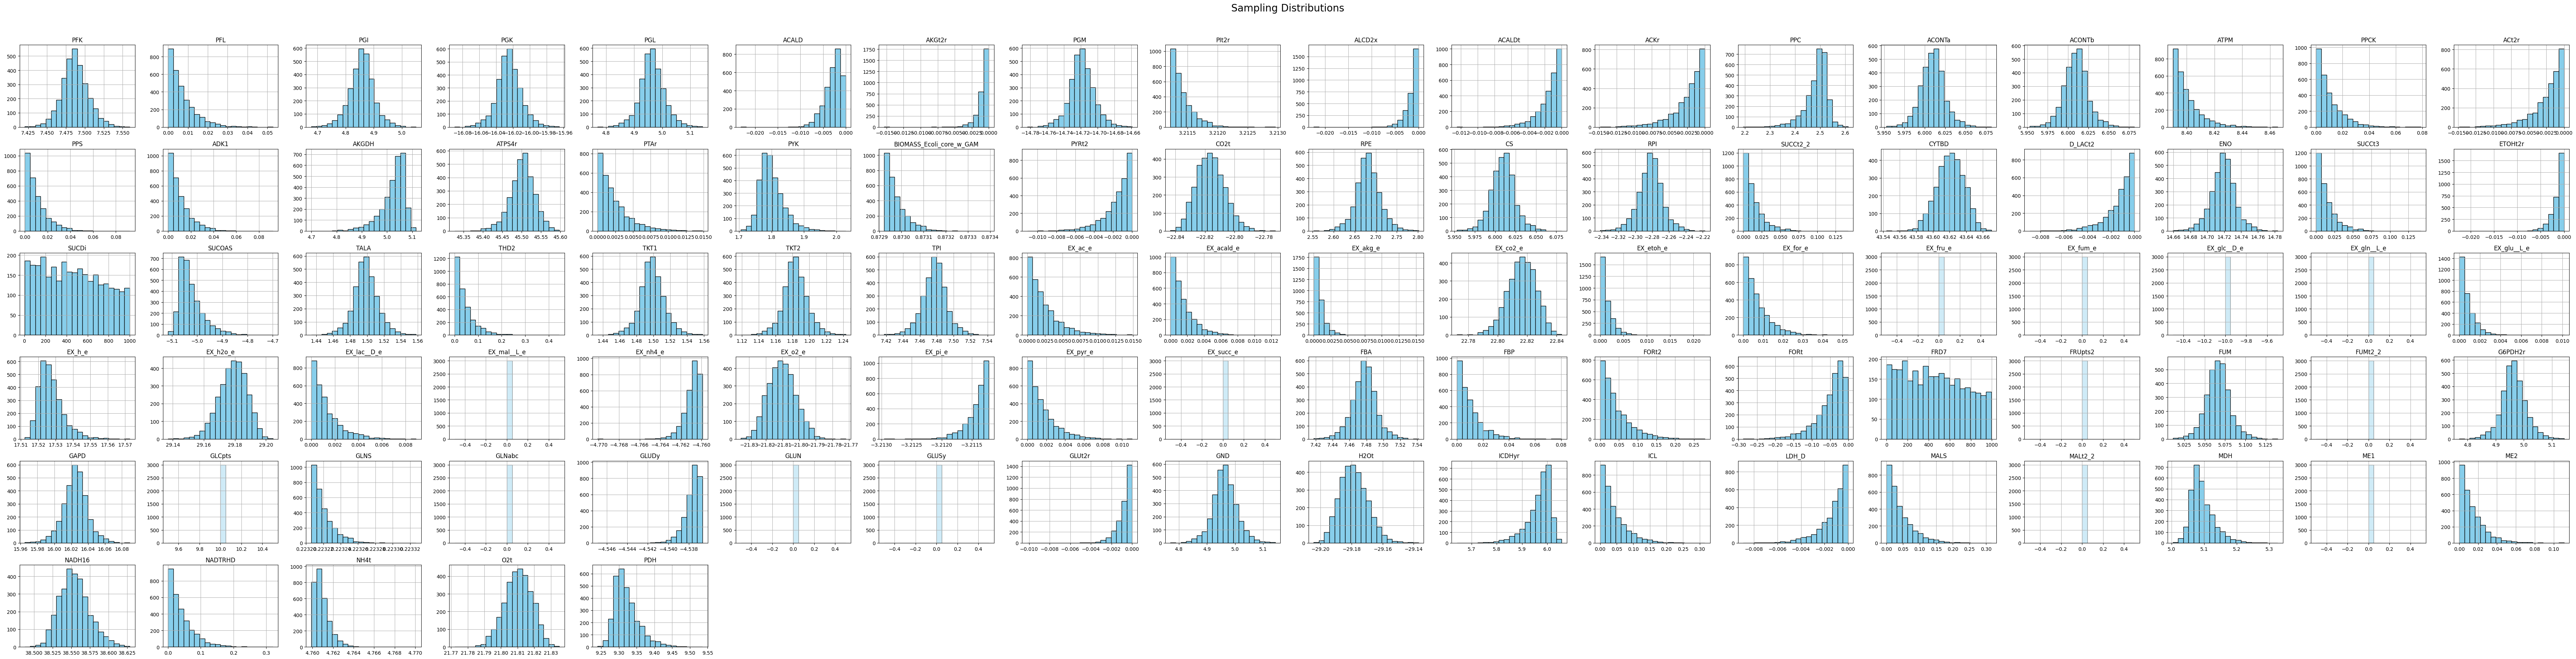

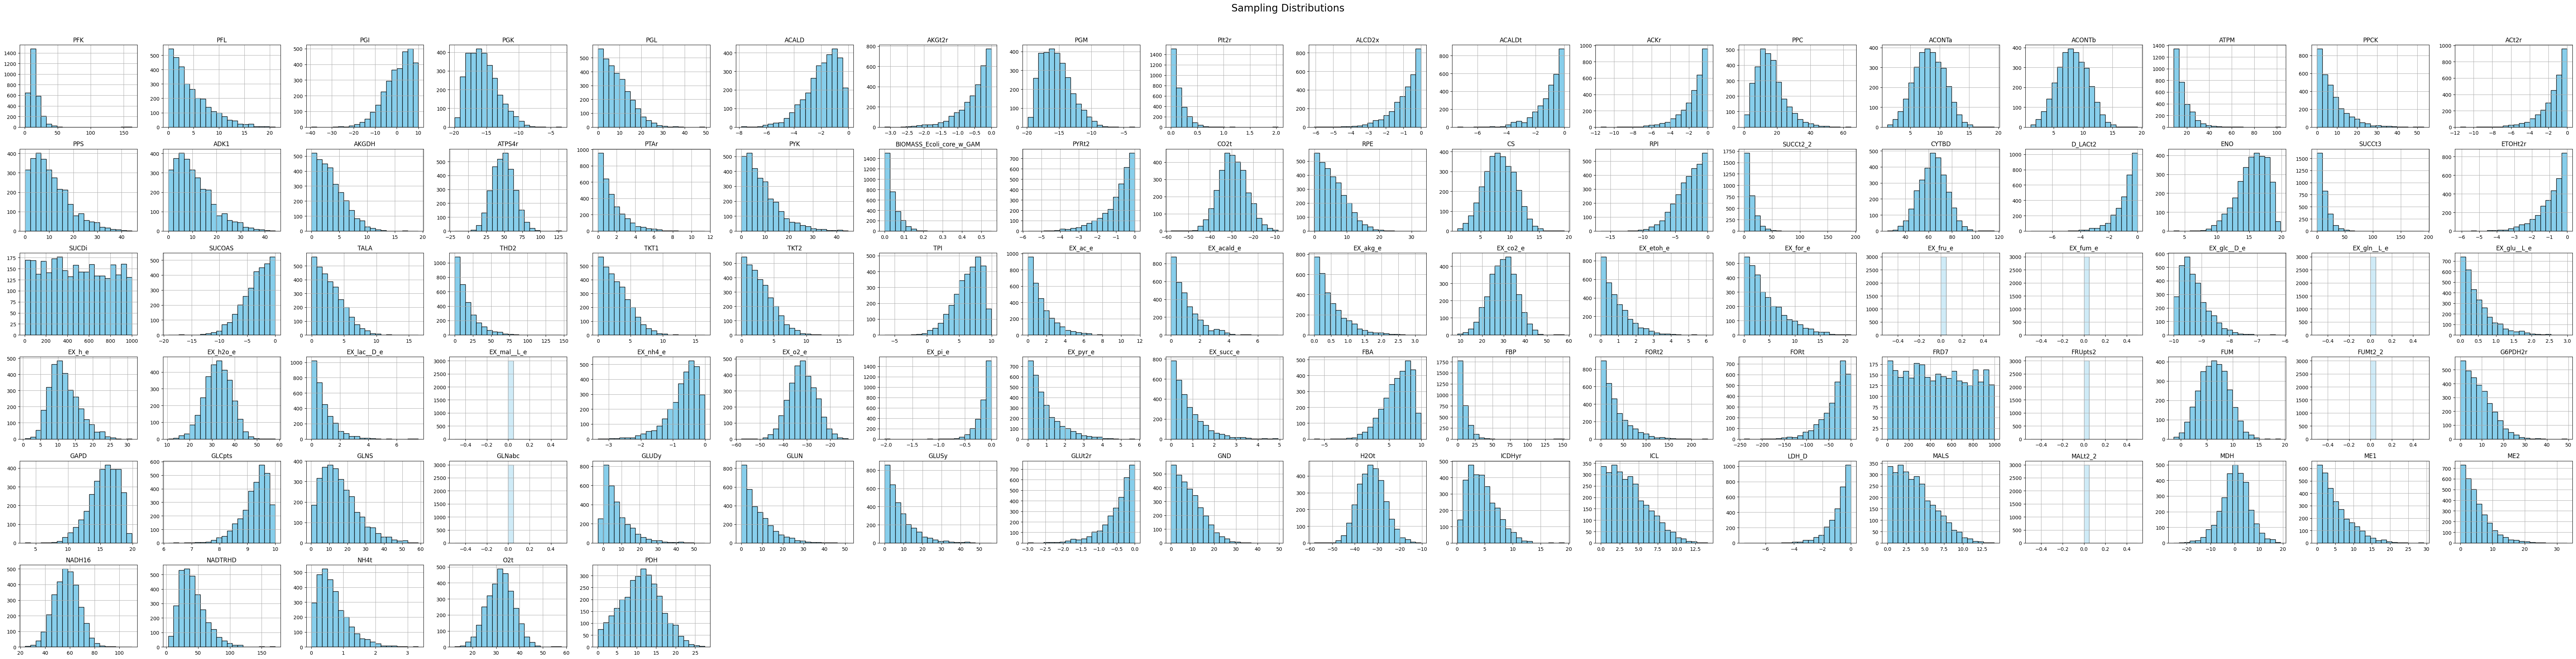

In [9]:
plot_grid_95_reactions(samples_dingo_condition_100, ec_cobra_model, nrows=6, ncols=18)
plot_grid_95_reactions(samples_dingo_condition_0, ec_cobra_model, nrows=6, ncols=18)


plot_grid_95_reactions(samples_optgp_condition_100, ec_cobra_model, nrows=6, ncols=18)
plot_grid_95_reactions(samples_optgp_condition_0, ec_cobra_model, nrows=6, ncols=18)


### Print statistics for reaction of interest

In [10]:

mean, min, max, std, skewness, kurtosis = sampling_statistics(
    samples            = samples_dingo_condition_100,
    reactions_ids_list = ec_dingo_reactions,
    reaction_id        = "FRD7"
)
print(mean, min, max, std, skewness, kurtosis)


mean, min, max, std, skewness, kurtosis = sampling_statistics(
    samples            = samples_optgp_condition_100,
    reactions_ids_list = ec_dingo_reactions,
    reaction_id        = "FRD7"
)
print(mean, min, max, std, skewness, kurtosis)


468.6457845672158 4.3010723839188246e-06 994.8154378748294 325.6341776300663 0.06161413942787628 -1.306498878449453
455.1046192508106 0.23438217648202886 993.6103493743267 281.5495265615163 0.1662759996291065 -1.1234516785368913


In [18]:
import pandas as pd
st = samples_dingo_condition_100.T
df = pd.DataFrame(st)
df.columns = ec_dingo_model.reactions

In [25]:
import numpy as np
print(np.min(df["NADH16"]), np.max(df["NADH16"]))

38.53459388932447 38.53465918810301
